## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

In [3]:
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 觀察 Age

In [4]:
print(df_train['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


C:\Users\avalin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


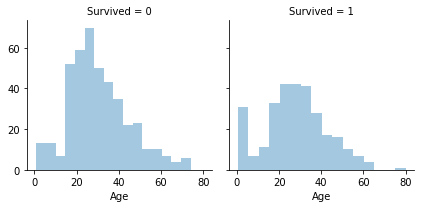

In [5]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

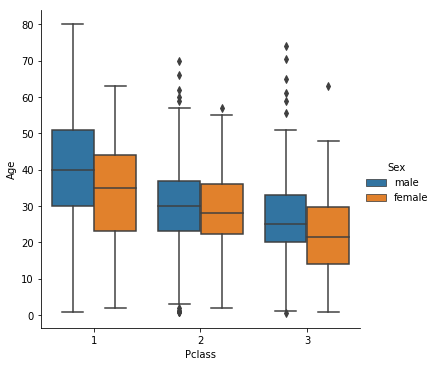

In [6]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex",
               data=df_train,kind="box")

In [7]:
from sklearn import preprocessing
from sklearn.impute import KNNImputer

In [8]:
le = preprocessing.LabelEncoder()
df_train['Pclass']=le.fit_transform(df_train['Pclass'])
df_train['Sex']=le.fit_transform(df_train['Sex'])

df=df_train[['Sex','Age','Pclass']]

In [12]:
#設定用多少鄰居資訊來補值
value_neighbors=1
#進行 KNN的一些設定
imputer = KNNImputer(n_neighbors=value_neighbors)
#把資料放進去，進行補值
df_filled = pd.DataFrame(imputer.fit_transform(df))

missing_index=df.isnull()
#只呈現有遺失值的資料
display(df[missing_index.values==True])
#只呈現有遺失值的資料-呈現補值的結果
display(df_filled[missing_index.values==True])

,Sex,Age,Pclass
5,1,NaN,2
17,1,NaN,1
19,0,NaN,2
26,1,NaN,2
28,0,NaN,2
29,1,NaN,2
31,0,NaN,0
32,0,NaN,2
36,1,NaN,2
42,1,NaN,2


,0,1,2
5,1.0,22.0,2.0
17,1.0,35.0,1.0
19,0.0,26.0,2.0
26,1.0,22.0,2.0
28,0.0,26.0,2.0
29,1.0,22.0,2.0
31,0.0,38.0,0.0
32,0.0,26.0,2.0
36,1.0,22.0,2.0
42,1.0,22.0,2.0
